# ENV/ATM 415: Climate Laboratory

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 6: A Brief Review of Radiation

## Contents

1. [Emission temperature and lapse rates](#section1)
2. [Solar Radiation](#section2)
3. [Terrestrial Radiation and absorption spectra](#section3)

____________
<a id='section1'></a>

## 1. Emission temperature and lapse rates
____________

Planetary energy balance is the foundation for all climate modeling. So far we have expressed this through a globally averaged budget

$$C \frac{d T_s}{dt} = (1-\alpha) Q - OLR$$

and we have written the OLR in terms of an emission temperature $T_e$ where by definition

$$ OLR = \sigma T_e^4 $$

Using values from the observed planetary energy budget, we found that $T_e = 255$ K

The emission temperature of the planet is thus about 33 K colder than the mean surface temperature (288 K).

### Where in the atmosphere do we find $T = T_e = 255$ K?

That's about -18ºC.

Let's plot **global, annual average observed air temperature** from NCEP reanalysis data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_air = xr.open_dataset(ncep_url + "pressure/air.mon.1981-2010.ltm.nc",
                          decode_times=False)
print(ncep_air)

<xarray.Dataset>
Dimensions:             (lat: 73, level: 17, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * level               (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 ...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 ...
  * time                (time) float64 -6.571e+05 -6.57e+05 -6.57e+05 ...
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    air                 (time, level, lat, lon) float64 ...
    valid_yr_count      (time, level, lat, lon) float64 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    title:           

In [3]:
#  Take global, annual average and convert to Kelvin
from xarray.ufuncs import cos, deg2rad, log
coslat = cos(deg2rad(ncep_air.lat))
weight = coslat / coslat.mean(dim='lat')
Tglobal = (ncep_air.air * weight).mean(dim=('lat','lon','time'))
Tglobal.name
Tglobal

<xarray.DataArray (level: 17)>
array([ 15.179082,  11.207002,   7.838327,   0.219941,  -6.448343, -14.888844,
       -25.570467, -39.369685, -46.797908, -53.652235, -60.563551, -67.006048,
       -65.532927, -61.486637, -55.853581, -51.593945, -43.219982])
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...

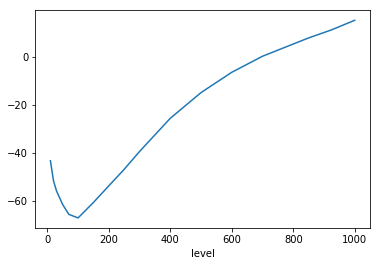

In [4]:
#  a "quick and dirty" visualization of the data
Tglobal.plot()

Let's make a better plot.

Here we're going to use a package called `metpy` to automate plotting this temperature profile in a way that's more familiar to meteorologists: a so-called *skew-T* plot.

In [5]:
from metpy.plots import SkewT

Text(0.5,1,'Global, annual mean sounding from NCEP Reanalysis')

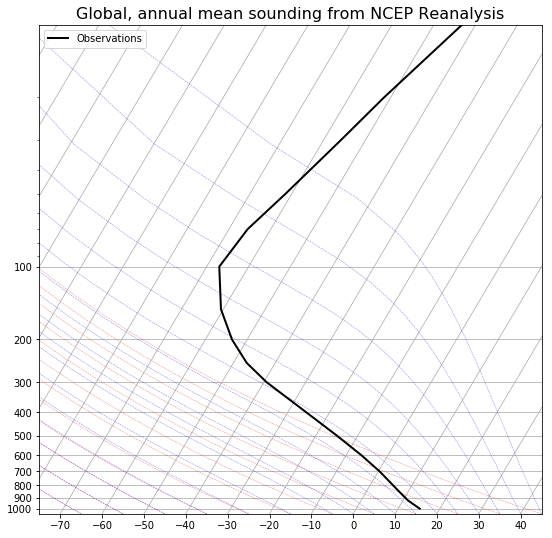

In [6]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)
skew.plot(Tglobal.level, Tglobal, color='black', linestyle='-', linewidth=2, label='Observations')
skew.ax.set_ylim(1050, 10)
skew.ax.set_xlim(-75, 45)
# Add the relevant special lines
skew.plot_dry_adiabats(linewidth=0.5)
skew.plot_moist_adiabats(linewidth=0.5)
#skew.plot_mixing_lines()
skew.ax.legend()
skew.ax.set_title('Global, annual mean sounding from NCEP Reanalysis', 
             fontsize = 16)

Note that surface temperature in global mean is indeed about 288 K or 15ºC as we keep saying.

So where do we find temperature $T_e=255$ K or -18ºC?

Actually in mid-troposphere, near 500 hPa or about 5 km height.

We can infer that much of the outgoing longwave radiation actually originates far above the surface.

Recall that our observed global energy budget diagram shows 217 out of 239 W m$^{-2}$ total OLR emitted by the atmosphere and clouds, only 22 W m$^{-2}$ directly from the surface.

This is due to the **greenhouse effect**. 

So far we have dealt with the greenhouse in a very artificial way in our energy balance model by simply assuming 

$$ \text{OLR} = \tau \sigma T_s^4 $$

i.e., the OLR is reduced by a constant factor from the value it would have if the Earth emitted as a blackbody at the surface temperature.

Now it's time to start thinking a bit more about how the radiative transfer process actually occurs in the atmosphere, and how to model it.

____________
<a id='section2'></a>

## 2. Solar Radiation
____________

Let's plot a spectrum of solar radiation.

For details, see code in notebook!

In [7]:
#  Using pre-defined code for the Planck function from the climlab package
from climlab.utils.thermo import Planck_wavelength

In [8]:
# approximate emission temperature of the sun in Kelvin
Tsun = 5780.
# boundaries of visible region in nanometers
UVbound = 390.
IRbound = 700.
#  array of wavelengths
wavelength_nm = np.linspace(0., 3500, 400)
to_meters = 1E-9  # conversion factor

/Users/br546577/anaconda3/lib/python3.6/site-packages/climlab/utils/thermo.py:159: RuntimeWarning: divide by zero encountered in true_divide
  u = h*c/l/k/T
/Users/br546577/anaconda3/lib/python3.6/site-packages/climlab/utils/thermo.py:160: RuntimeWarning: invalid value encountered in true_divide
  return 2*k**5*T**5/h**4/c**3*u**5/(np.exp(u)-1)


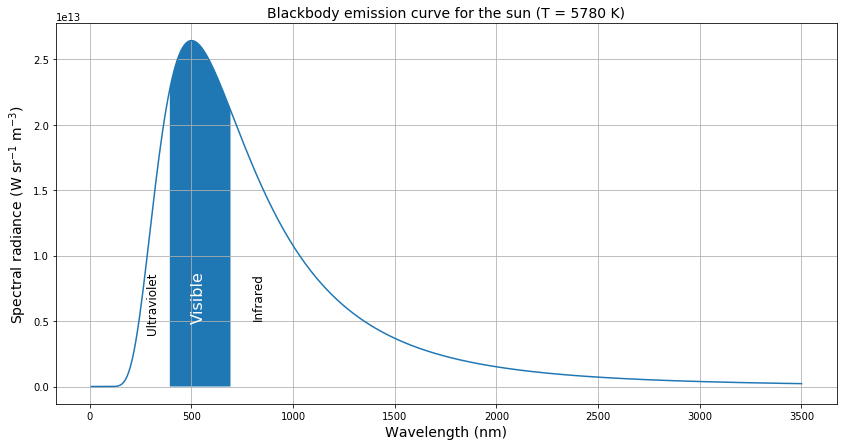

In [9]:
label_size=14
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(wavelength_nm, 
         Planck_wavelength(wavelength_nm * to_meters, Tsun))
ax.grid()
ax.set_xlabel('Wavelength (nm)', fontsize=label_size)
ax.set_ylabel('Spectral radiance (W sr$^{-1}$ m$^{-3}$)', fontsize=label_size)
#  Mask out points outside of this range
wavelength_vis = np.ma.masked_outside(wavelength_nm, UVbound, IRbound)
#  Shade the visible region
ax.fill_between(wavelength_vis, Planck_wavelength(wavelength_vis * to_meters, Tsun))
title = 'Blackbody emission curve for the sun (T = {:.0f} K)'.format(Tsun)
ax.set_title(title, fontsize=label_size);
ax.text(280, 0.8E13, 'Ultraviolet', rotation='vertical', fontsize=12)
ax.text(500, 0.8E13, 'Visible', rotation='vertical', fontsize=16, color='w')
ax.text(800, 0.8E13, 'Infrared', rotation='vertical', fontsize=12);

- Spectrum peaks in the visible range
- most energy at these wavelength.
- No coincidence that our eyes are sensitive to this range of wavelengths!
- Longer wavelengths called “infrared”, shorter wavelengths called “ultraviolet”.

The shape of the spectrum is a fundamental characteristic of radiative emissions
(think about the color of burning coals in a fire – cooler = red, hotter = white)

Theory and experiments tell us that both the total flux of emitted radiation, and the wavelength of maximum emission, depend only on the temperature of the source!

The theoretical spectrum was worked out by Max Planck and is therefore known as the “Planck” spectrum (or simply blackbody spectrum).

![Blackbody spectra for several temperatures](http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/MarshallPlumbFig2.3.png)

*Figure reproduced from Marshall and Plumb (2008): Atmosphere, Ocean, and Climate Dynamics*

Going from cool to warm:

- total emission increases
- maximum emission occurs at shorter wavelengths.

The **integral of these curves over all wavelengths** gives us our familiar $\sigma T^4$

Mathematically it turns out that 

$$ λ_{max} T = \text{constant} $$

(known as Wien’s displacement law).

By fitting the observed solar emission to a blackbody curve, we can deduce that the emission temperature of the sun is about 6000 K.

Knowing this, and knowing that the solar spectrum peaks at 0.6 micrometers, we can calculate the wavelength of maximum terrestrial radiation as

$$ λ_{max}^{Earth} = 0.6 ~ \mu m \frac{6000}{255} = 14 ~ \mu m $$

This is in the far-infrared part of the spectrum.

____________
<a id='section3'></a>

## 3. Terrestrial Radiation and absorption spectra
____________

Now let's look at normalized blackbody curves for Sun and Earth:

![Blackbody spectra and atmospheric absorption](http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/MarshallPlumbFig2.5.png)

*Figure reproduced from Marshall and Plumb (2008): Atmosphere, Ocean, and Climate Dynamics*

There is essentially no overlap between the two spectra.

**This is the fundamental reason we can discuss the solar “shortwave” and terrestrial “longwave” radiation as two distinct phenomena.**

In reality all radiation exists on a continuum of different wavelengths. But in climate science we can get a long way by thinking in terms of a very simple “two-stream” approximation (short and longwave). We’ve already been doing this throughout the course so far!

Now look at the atmospheric **absorption spectra**.

(fraction of radiation at each wavelength that is absorbed on a single vertical path through the atmosphere)

- Atmosphere is almost completely transparent in the visible range, right at the peak of the solar spectrum
- Atmosphere is very opaque in the UV
- Opacity across the IR spectrum is highly variable!
- Look at the gases associated with various absorption features:
- Main players include H$_2$O, CO$_2$, N$_2$O, O$_2$.
- Compare to major constituents of atmosphere, in decreasing order: 
    - 78% N$_2$
    - 21% O$_2$
    - 1% Ar
    - H$_2$O (variable) 

- The dominant constituent gases N$_2$ and O$_2$ are nearly completely transparent across the entire spectrum (there are O$_2$ absorption features in far UV, but little energy at these wavelengths).
- The greenhouse effect mostly involves trace constituents: 
    - O$_3$ = 500 ppb
    - N$_2$O = 310 ppb
    - CO$_2$ = 400 ppm (but rapidly increasing!)
    - CH$_4$ = 1.7 ppm
- Note that most of these are tri-atomic molecules! There are fundamental reasons for this: these molecules have modes of rotational and vibration that are easily excited at IR wavelengths. See courses in radiative transfer!
